In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import matplotlib
from matplotlib import font_manager, rc
import platform
if platform.system()=="Windows":
    font_name=font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
matplotlib.rcParams['axes.unicode_minus']=False

import warnings
warnings.filterwarnings("ignore")

In [3]:
# 태그 빈도

In [3]:
train = pd.read_json("train.json", encoding='utf-8')
train

,tags,id,plylst_title,songs,like_cnt,updt_date
0,[락],61281,여행같은 음악,"[525514, 129701, 383374, 562083, 297861, 13954...",71,2013-12-19 18:36:19.000
1,"[추억, 회상]",10532,요즘 너 말야,"[432406, 675945, 497066, 120377, 389529, 24427...",1,2014-12-02 16:19:42.000
2,"[까페, 잔잔한]",76951,"편하게, 잔잔하게 들을 수 있는 곡.-","[83116, 276692, 166267, 186301, 354465, 256598...",17,2017-08-28 07:09:34.000
3,"[연말, 눈오는날, 캐럴, 분위기, 따듯한, 크리스마스캐럴, 겨울노래, 크리스마스,...",147456,크리스마스 분위기에 흠뻑 취하고 싶을때,"[394031, 195524, 540149, 287984, 440773, 10033...",33,2019-12-05 15:15:18.000
4,[댄스],27616,추억의 노래 ㅋ,"[159327, 553610, 5130, 645103, 294435, 100657,...",9,2011-10-25 13:54:56.000
...,...,...,...,...,...,...
115066,"[록메탈, 밴드사운드, 록, 락메탈, 메탈, 락, extreme]",120325,METAL E'SM #2,"[429629, 441511, 612106, 516359, 691768, 38714...",3,2020-04-17 04:31:11.000
115067,[일렉],106976,빠른 리스너를 위한 따끈따끈한 최신 인기 EDM 모음!,"[321330, 216057, 534472, 240306, 331098, 23288...",13,2015-12-24 17:23:19.000
115068,"[담시, 가족, 눈물, 그리움, 주인공, 나의_이야기, 사랑, 친구]",11343,#1. 눈물이 앞을 가리는 나의_이야기,"[50512, 249024, 250608, 371171, 229942, 694943...",4,2019-08-16 20:59:22.000
115069,"[잔잔한, 버스, 퇴근버스, Pop, 풍경, 퇴근길]",131982,퇴근 버스에서 편히 들으면서 하루를 마무리하기에 좋은 POP,"[533534, 608114, 343608, 417140, 609009, 30217...",4,2019-10-25 23:40:42.000


In [4]:
tagList = list(train['tags'])

In [5]:
tagList = str(tagList)
# tagList

In [6]:
import re

In [7]:
regex = re.compile("[가-힣]+")
tagList = regex.findall(tagList)
# tagList

In [8]:
from konlpy.tag import Twitter
from collections import Counter

In [9]:
count = Counter(tagList)
freqTags = dict(count.most_common())
# freqTags

In [10]:
from wordcloud import WordCloud
import nltk
from IPython.display import set_matplotlib_formats

In [11]:
%matplotlib inline
matplotlib.rc('font',family = 'Malgun Gothic')
set_matplotlib_formats('retina')
matplotlib.rc('axes',unicode_minus = False)

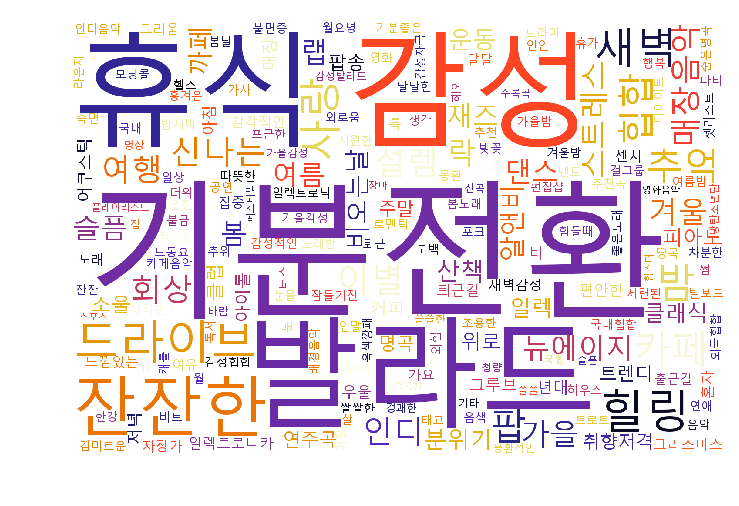

In [96]:
wordcloud = WordCloud(font_path = 'C:/Windows/Fonts/malgun.ttf', background_color='white', colormap = "CMRmap",
                      width=1500, height=1000).generate_from_frequencies(freqTags)
plt.imshow(wordcloud)
plt.axis('off')
# sns.set_palette("Prism_r")
plt.show()

In [66]:
#################################################################################################

In [16]:
# 상위 50개 태그
k = list(freqTags.keys())
v = list(freqTags.values())

In [17]:
tagCount = pd.DataFrame(v,k).reset_index().rename(columns={"index":"tag", 0:'count'})
tagCount

,tag,count
0,기분전환,16474
1,감성,11473
2,휴식,11271
3,발라드,10809
4,잔잔한,10268
...,...,...
23934,펼치져는재즈의향연,1
23935,피부과,1
23936,사랑하고있을때,1
23937,우울해지고싶을때듣는노래,1


In [18]:
tagTop50 = tagCount.head(50)
tagTop50

,tag,count
0,기분전환,16474
1,감성,11473
2,휴식,11271
3,발라드,10809
4,잔잔한,10268
5,드라이브,10112
6,힐링,9840
7,사랑,8706
8,새벽,8353
9,밤,7649


In [22]:
import matplotlib
from matplotlib import font_manager, rc
import platform
if platform.system()=="Windows":
    font_name=font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
matplotlib.rcParams['axes.unicode_minus']=False

import warnings
warnings.filterwarnings("ignore")

Text(0.5, 1.0, '상위 50개 태그')

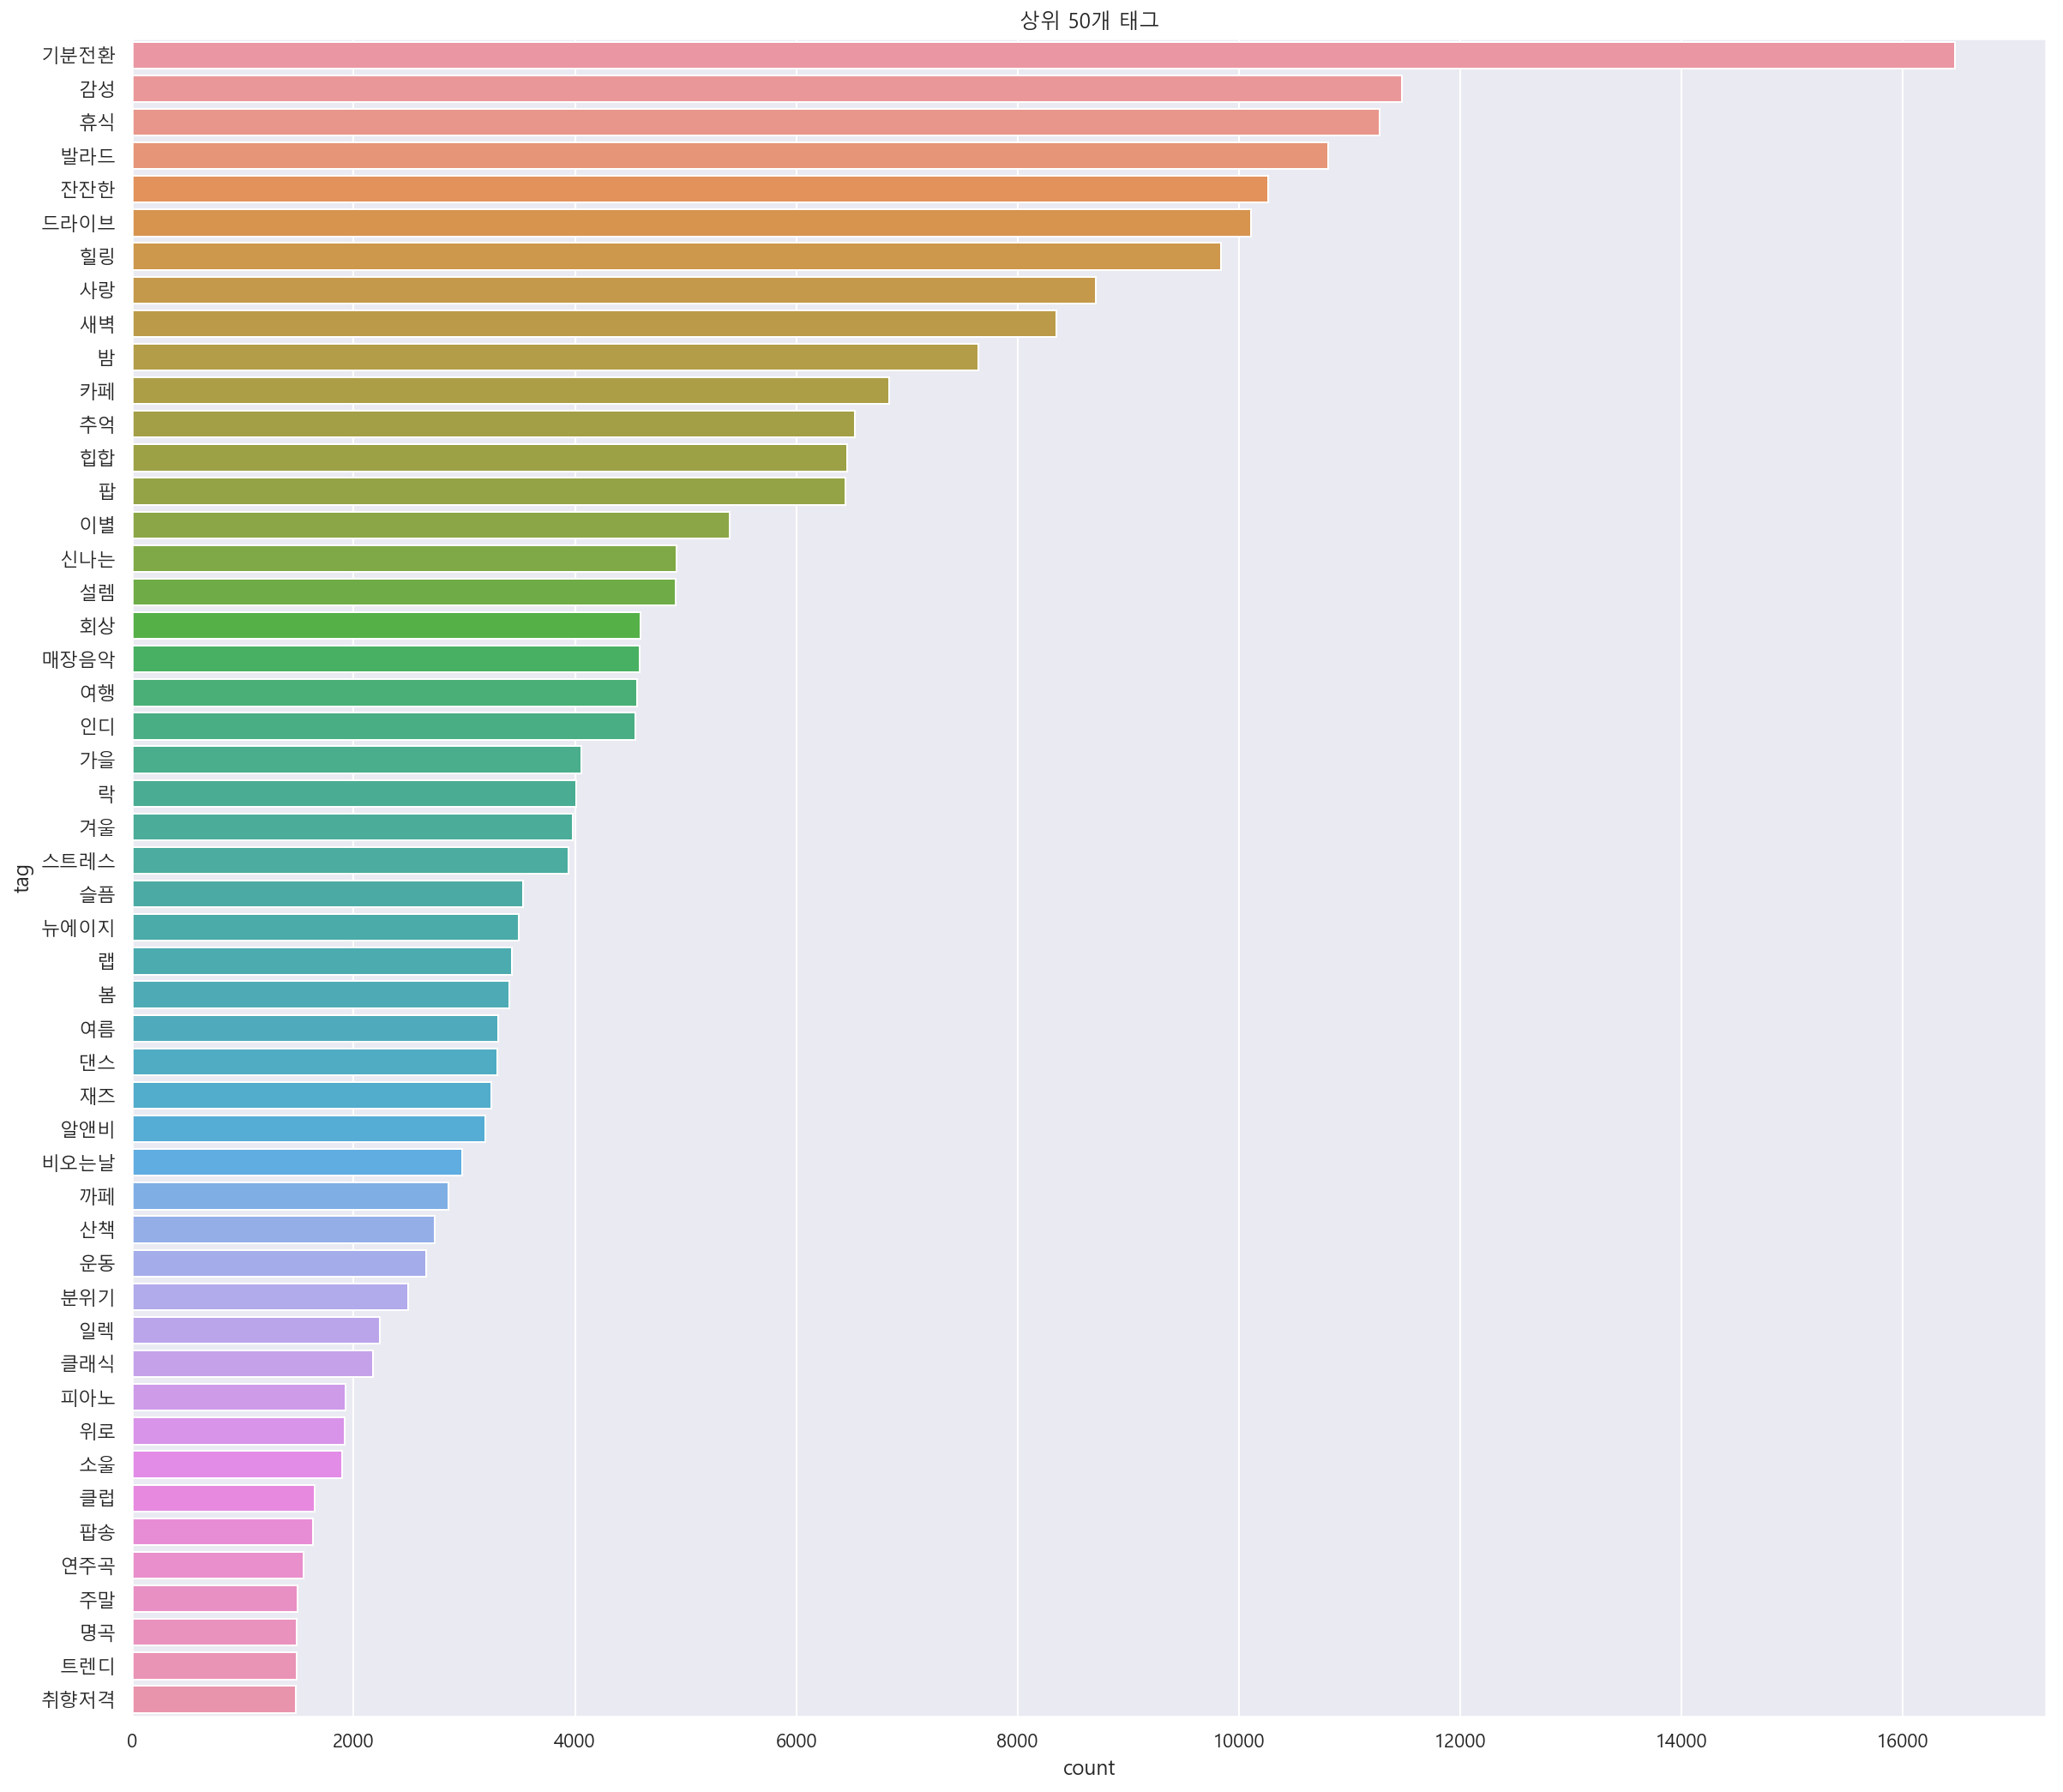

In [23]:
sns.barplot(data=tagTop50, x='count', y='tag')
sns.set(rc={'figure.figsize':(20,18)})
plt.title("상위 50개 태그")
# plt.xlabel("빈도수")
# plt.ylabel("태그")